# Suggestion de Tags - Approche non supervisée

#### Divers: Imports, options

In [1]:
%load_ext pycodestyle_magic
%flake8_on --max_line_length 130

In [2]:
# suppression des "FutureWarning"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import time as time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [4]:
pd.set_option('display.max_columns', None)

## Chargement Données

In [5]:
df = pd.read_csv("questions_clean.csv", index_col=0)
df

,Title,Body,Tags,Text
0,java record array,give follow code public static void main strin...,<java><arrays><java-14><java-record>,java record array give follow code public stat...
1,blue flicker stripe mbp chrome,new macbook pro late catalina recent find weir...,<google-chrome><graphics><macos-catalina>,blue flicker stripe mbp chrome new macbook pro...
2,creat dependson relat ec rd use aw cdk,current use aw cdk typescript creat stack cons...,<amazon-web-services><amazon-ec2><amazon-rds><...,creat dependson relat ec rd use aw cdk current...
3,colab class weight caus valueerror truth valu ...,run cnn kera sequenti googl colab get follow e...,<python><tensorflow><keras><google-colaborator...,colab class weight caus valueerror truth valu ...
4,pas custom function insid foreach object parallel,find way pas function variabl idea without put...,<powershell><powershell-core>,pas custom function insid foreach object paral...
...,...,...,...,...
8064,daemon stop immedi jvm garbag collector thrash...,build multi modul java project use gradl add m...,<java><gradle>,daemon stop immedi jvm garbag collector thrash...
8065,differ mono flux fromcal mono defer,usual requir gener mono flux whose valu gener ...,<spring-webflux><project-reactor>,differ mono flux fromcal mono defer usual requ...
8066,compar gener struct c,want compar struct gener way do someth like ca...,<c++><templates><struct><padding><memcmp>,compar gener struct c want compar struct gener...
8067,set custom http error kubernet,want creat custom error page current alreadi i...,<kubernetes><kubernetes-ingress>,set custom http error kubernet want creat cust...


In [6]:
df['Text'][0]

'java record array give follow code public static void main string arg record foo int int var int new int var foo new foo int system println foo foo int system println new foo new int equal new foo new int fals system println new foo int equal new foo int true system println foo equal foo true seem obvious array tostr equal method use instead static method array equal array deepequ array tostr guess java record jep work well array respect method gener ide least intellij default gener use method e use static method array solut'

## Tokenization

In [7]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
df['Text_tok'] = df['Text'].map(tokenizer.tokenize)

In [8]:
df['FreqDist'] = df['Text_tok'].map(nltk.FreqDist)
df['WordCount'] = df['Text_tok'].map(len)
df['UniqueWordCount'] = df['FreqDist'].map(len)

In [9]:
df

,Title,Body,Tags,Text,Text_tok,FreqDist,WordCount,UniqueWordCount
0,java record array,give follow code public static void main strin...,<java><arrays><java-14><java-record>,java record array give follow code public stat...,"[java, record, array, give, follow, code, publ...","{'java': 2, 'record': 3, 'array': 7, 'give': 1...",97,40
1,blue flicker stripe mbp chrome,new macbook pro late catalina recent find weir...,<google-chrome><graphics><macos-catalina>,blue flicker stripe mbp chrome new macbook pro...,"[blue, flicker, stripe, mbp, chrome, new, macb...","{'blue': 2, 'flicker': 2, 'stripe': 2, 'mbp': ...",58,49
2,creat dependson relat ec rd use aw cdk,current use aw cdk typescript creat stack cons...,<amazon-web-services><amazon-ec2><amazon-rds><...,creat dependson relat ec rd use aw cdk current...,"[creat, dependson, relat, ec, rd, use, aw, cdk...","{'creat': 2, 'dependson': 2, 'relat': 1, 'ec':...",70,43
3,colab class weight caus valueerror truth valu ...,run cnn kera sequenti googl colab get follow e...,<python><tensorflow><keras><google-colaborator...,colab class weight caus valueerror truth valu ...,"[colab, class, weight, caus, valueerror, truth...","{'colab': 2, 'class': 11, 'weight': 8, 'caus':...",447,182
4,pas custom function insid foreach object parallel,find way pas function variabl idea without put...,<powershell><powershell-core>,pas custom function insid foreach object paral...,"[pas, custom, function, insid, foreach, object...","{'pas': 2, 'custom': 1, 'function': 4, 'insid'...",36,23
...,...,...,...,...,...,...,...,...
8064,daemon stop immedi jvm garbag collector thrash...,build multi modul java project use gradl add m...,<java><gradle>,daemon stop immedi jvm garbag collector thrash...,"[daemon, stop, immedi, jvm, garbag, collector,...","{'daemon': 16, 'stop': 3, 'immedi': 2, 'jvm': ...",144,50
8065,differ mono flux fromcal mono defer,usual requir gener mono flux whose valu gener ...,<spring-webflux><project-reactor>,differ mono flux fromcal mono defer usual requ...,"[differ, mono, flux, fromcal, mono, defer, usu...","{'differ': 3, 'mono': 9, 'flux': 2, 'fromcal':...",69,39
8066,compar gener struct c,want compar struct gener way do someth like ca...,<c++><templates><struct><padding><memcmp>,compar gener struct c want compar struct gener...,"[compar, gener, struct, c, want, compar, struc...","{'compar': 4, 'gener': 3, 'struct': 6, 'c': 2,...",103,67
8067,set custom http error kubernet,want creat custom error page current alreadi i...,<kubernetes><kubernetes-ingress>,set custom http error kubernet want creat cust...,"[set, custom, http, error, kubernet, want, cre...","{'set': 1, 'custom': 5, 'http': 7, 'error': 5,...",183,81


## Analyse exploratoire : Visualisations

,UniqueWordCount,WordCount
2476,5,8
3024,7,9
3191,10,10
5464,8,10
3299,8,11
...,...,...
2405,371,2913
7546,211,2914
5603,347,3095
4824,659,3143


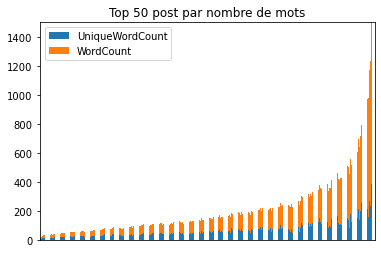

Wall time: 29.8 s


In [10]:
%%time

# Affichage des fréquences
dfPlot = df.sort_values(by="WordCount")[['UniqueWordCount', 'WordCount']]
display(dfPlot)
dfPlot.plot(kind='bar', title='Top 50 post par nombre de mots', stacked=True, ylim=(0,1500))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

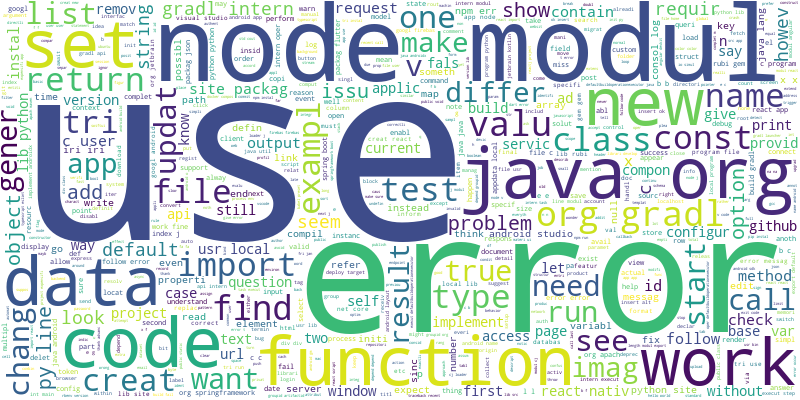

In [11]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['Text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=800, height=400)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## KMeans

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

vectorizer = TfidfVectorizer(
    max_df=0.5,
    # max_features=opts.n_features,
    min_df=2,
    stop_words="english",
    use_idf=True,
)

In [13]:
%%time

X = vectorizer.fit_transform(df['Text'])

Wall time: 738 ms


In [14]:
print("n_samples: %d, n_features: %d" % X.shape)


n_samples: 8069, n_features: 13961


In [15]:
%%time

# Elbow method 
# --------------- /!\ c'est tres long selon la plage choisie /!\ ---------------
import seaborn as sns

if False:
    sse = {}
    for k in range(20, 201, 20):
        print("k ", end="")
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse[k] = kmeans.inertia_  # SSE to closest cluster centroid
    plt.title('The Elbow Method')
    plt.xlabel('k')
    plt.ylabel('SSE')
    sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
    plt.show()

Wall time: 66 ms


In [16]:
# on choisi 40 clusters d'apres elbow
nk = 40

In [17]:
%%time

km = KMeans(
    n_clusters=nk,
    init="k-means++",
    max_iter=100,
    n_init=1
)
print("Clustering sparse data with %s" % km)
km.fit(X)

Clustering sparse data with KMeans(max_iter=100, n_clusters=40, n_init=1)
Wall time: 8.89 s


KMeans(max_iter=100, n_clusters=40, n_init=1)

In [18]:
%%time

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Silhouette Coefficient: 0.017
Wall time: 49 ms


In [19]:
print("Top 10 terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(nk):
    print("Cluster %d:" % i, end="")
    for ind in order_centroids[i, :10]:
        print(" %s" % terms[ind], end="")
    print()


Top 10 terms per cluster:
Cluster 0: android layout fragment view id bind navig parent app inflat
Cluster 1: py python line lib file site packag import self modul
Cluster 2: file folder path upload error run build code line html
Cluster 3: net core microsoft dotnet sdk asp project visual version aspnetcor
Cluster 4: android studio emul sdk com app build error version flutter
Cluster 5: list element item number valu index pair filter print want
Cluster 6: flutter dart android packag web pub app build widget version
Cluster 7: compon react prop const materi ui state ref import render
Cluster 8: rout router react compon import dom page const app path
Cluster 9: div react const form px compon usest button class classnam
Cluster 10: compos jetpack modifi androidx text dp lazycolumn item icon column
Cluster 11: python pip instal packag version py usr error file run
Cluster 12: spring boot artifactid groupid org springframework maven depend java plugin
Cluster 13: array arr element int pointe

In [20]:
X.shape

(8069, 13961)

## LDA

https://scikit-learn.org/stable/modules/multiclass.html#multilabel-classification

In [21]:
%%time

from gensim.corpora.dictionary import Dictionary
from gensim import models

# Create a corpus from a list of texts
g_text = df['Text_tok'].to_list()
dictionary = Dictionary(g_text)
bow_corpus = [dictionary.doc2bow(text) for text in g_text]

Wall time: 1.27 s


In [22]:
'''
Checking dictionary created
'''
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 arg
1 array
2 code
3 deepequ
4 default
5 e
6 equal
7 fals
8 follow
9 foo
10 gener


In [23]:
len(dictionary)

43161

In [24]:
%%time

# Train the model on the corpus.
lda = models.LdaModel(bow_corpus, num_topics=10, id2word = dictionary)

Wall time: 3.95 s


In [25]:
lda.get_topics().shape

(10, 43161)

In [26]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")


Topic: 0 
Words: 0.032*"user" + 0.014*"qemu" + 0.013*"file" + 0.012*"set" + 0.012*"error" + 0.011*"path" + 0.010*"use" + 0.009*"servic" + 0.009*"name" + 0.009*"support"


Topic: 1 
Words: 0.022*"py" + 0.017*"docker" + 0.017*"build" + 0.016*"instal" + 0.016*"packag" + 0.015*"pyenv" + 0.015*"conda" + 0.015*"python" + 0.014*"file" + 0.012*"error"


Topic: 2 
Words: 0.030*"modul" + 0.028*"j" + 0.025*"react" + 0.025*"node" + 0.018*"error" + 0.017*"eslint" + 0.013*"app" + 0.012*"vue" + 0.011*"use" + 0.010*"project"


Topic: 3 
Words: 0.026*"maven" + 0.025*"org" + 0.020*"plugin" + 0.015*"mono" + 0.015*"http" + 0.014*"version" + 0.014*"error" + 0.013*"groupid" + 0.013*"context" + 0.013*"artifactid"


Topic: 4 
Words: 0.015*"use" + 0.008*"error" + 0.008*"c" + 0.008*"run" + 0.008*"int" + 0.007*"std" + 0.006*"php" + 0.006*"type" + 0.006*"file" + 0.006*"k"


Topic: 5 
Words: 0.051*"android" + 0.022*"com" + 0.021*"app" + 0.012*"build" + 0.010*"version" + 0.010*"flutter" + 0.010*"error" + 0.009*"jav

In [27]:
import pyLDAvis as pyLDAv
import pyLDAvis.gensim_models as gensimvis

pyLDAv.enable_notebook()
gensimvis.prepare(lda, bow_corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.095932  0.011948       1        1  17.787980
8      0.078146  0.091320       2        1  15.340439
2     -0.018328  0.012592       3        1  14.438862
0      0.039671 -0.069214       4        1  11.313460
5     -0.110607  0.082604       5        1   9.003044
1      0.082753 -0.161183       6        1   8.067788
7      0.012210  0.176322       7        1   8.067018
6      0.152373 -0.032759       8        1   7.381455
9     -0.199284 -0.077924       9        1   5.961810
3     -0.132866 -0.033709      10        1   2.638145, topic_info=          Term         Freq         Total Category  logprob  loglift
17        java  7882.000000   7882.000000  Default  30.0000  30.0000
312    android  6441.000000   6441.000000  Default  29.0000  29.0000
419        org  4578.000000   4578.000000  Default  28.0000  28.0000
3531     conda  4375.000000   4375.000000  Default  27.0000  27.0000
735          j  5815.000000   5815.000000  Default  26.0000  26.0000
...        ...          ...           ...      ...      ...      ...
217       name   173.514480   5999.397532  Topic10  -5.2417   0.0919
343   configur   136.089296   1786.867903  Topic10  -5.4846   1.0602
369       file   168.240815   7992.622800  Topic10  -5.2725  -0.2258
8       follow   145.502240   4110.612072  Topic10  -5.4177   0.2940
35         use   145.717072  12247.396426  Topic10  -5.4163  -0.7963

[793 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
758        1  0.006749      aaa
758        2  0.917890      aaa
758        3  0.006749      aaa
758        4  0.013498      aaa
758        6  0.013498      aaa
...      ...       ...      ...
14980      4  0.964418  zookeep
8780       1  0.009498     zoom
8780       5  0.009498     zoom
8780       6  0.066488     zoom
8780       7  0.892836     zoom

[3703 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 3, 1, 6, 2, 8, 7, 10, 4])

In [28]:
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=g_text, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.203573936950374

Coherence Score:  0.4840461891104796


#### Avec Mallet's  LDA

In [29]:
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME': r'C:\Users\beb4e\Documents\OpenClassrooms\P5\mallet-2.0.8\mallet-2.0.8'})
# You should update this path as per the path of Mallet directory on your system.
mallet_path = r'C:\Users\beb4e\Documents\OpenClassrooms\P5\mallet-2.0.8\mallet-2.0.8\bin\mallet'
# You should update this path as per the path of Mallet directory on your system.

In [30]:
mallet_lda = models.wrappers.LdaMallet(mallet_path, corpus=bow_corpus, num_topics=10, id2word=dictionary)

In [33]:
# on converti le modele Mallet's LDA en LDA, pour l'affichage: pyLDAvis n'aime pas les modeles Mallet...
mallet_lda_backTo_lda = models.wrappers.ldamallet.malletmodel2ldamodel(mallet_lda)
gensimvis.prepare(mallet_lda_backTo_lda, bow_corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.205205  0.146171       1        1  11.712325
0      0.247238  0.094982       2        1  11.151211
3     -0.160866  0.056168       3        1  10.788471
1     -0.098948  0.064863       4        1  10.024630
7     -0.015752 -0.096457       5        1   9.842282
6      0.101359  0.203047       6        1   9.681247
5     -0.219502 -0.066964       7        1   9.514387
9      0.237982 -0.187080       8        1   9.375512
2      0.201116  0.037835       9        1   9.242649
4     -0.087420 -0.252565      10        1   8.667287, topic_info=        Term         Freq         Total Category  logprob  loglift
312  android  8094.000000   8094.000000  Default  30.0000  30.0000
17      java  9163.000000   9163.000000  Default  29.0000  29.0000
419      org  6329.000000   6329.000000  Default  28.0000  28.0000
544    modul  7113.000000   7113.000000  Default  27.0000  27.0000
679     node  5432.000000   5432.000000  Default  26.0000  26.0000
..       ...          ...           ...      ...      ...      ...
410   messag   581.330741   2108.161215  Topic10  -5.2221   1.1574
167    error   761.579082  11852.691150  Topic10  -4.9520  -0.2993
321   applic   533.582836   2339.075722  Topic10  -5.3078   0.9677
455     test   538.357627   4303.428075  Topic10  -5.2989   0.3670
34      true   479.866444   3681.126188  Topic10  -5.4139   0.4081

[913 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
516        4  0.161126      abl
516        5  0.079342      abl
516        6  0.681123      abl
516        9  0.075680      abl
516       10  0.002441      abl
...      ...       ...      ...
2873       4  1.001412      wsl
9218       4  0.999649   xdebug
28689      6  1.001104  xffffff
696        3  1.000144     yarn
1501       2  1.000440    yield

[1565 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 4, 2, 8, 7, 6, 10, 3, 5])

In [36]:
# Compute Perplexity
# erreur avec Mallet, tant pis pour cette mesure

# Compute Coherence Score
coherence_model_mallet_lda = CoherenceModel(model=mallet_lda, texts=g_text, dictionary=dictionary, coherence='c_v')
coherence_mallet_lda = coherence_model_mallet_lda.get_coherence()
print('\nCoherence Score: ', coherence_mallet_lda)


Coherence Score:  0.5574443365051923


### recherche du nombre de topic optimal

In [42]:
def coherencePlot(coherence_values, start, limit, step):
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [37]:
def compute_coherence_values(dictionary, corpus, texts, with_mallet, limit, start=2, step=3, random_state=42):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        if with_mallet:
            model = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary, random_seed=random_state)
        else:
            model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, random_state=random_state)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [38]:
%%time

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=g_text,
                                                        with_mallet=False,
                                                        start=2, limit=40, step=6)

Wall time: 2min 14s


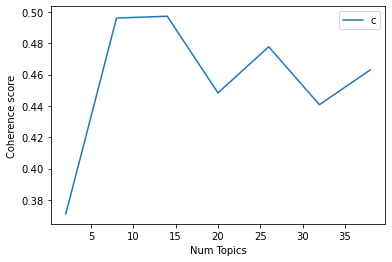

In [39]:
# Show graph
coherencePlot(coherence_values, 2, 40, 6)

In [40]:
%%time

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=g_text,
                                                        with_mallet=True,
                                                        start=2, limit=40, step=6)

Wall time: 8min 30s


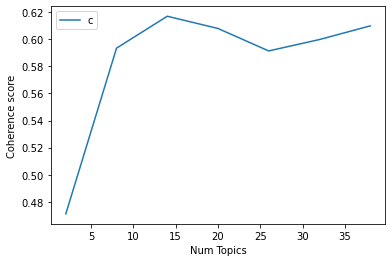

In [41]:
# Show graph
coherencePlot(coherence_values, 2, 40, 6)

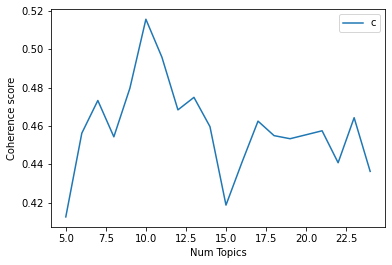

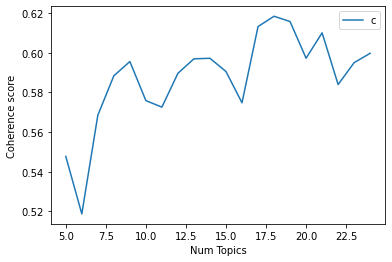

Wall time: 30min


In [45]:
%%time

# vu les resultats précedents, on affine la recherche 
limit = 25
start = 5
step = 1

# LDA
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=g_text,
                                                        with_mallet=False,
                                                        start=start, limit=limit, step=step)
coherencePlot(coherence_values, start, limit, step)
# Mallet LDA
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=g_text,
                                                        with_mallet=True,
                                                        start=start, limit=limit, step=step)
coherencePlot(coherence_values, start, limit, step)